In [47]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_classif
from sklearn.metrics import accuracy_score

In [48]:
#df = pd.read_csv('C:\\Users\\stoer\\OneDrive\\Desktop\\lymphography\\lymphography.data', header=None)
#df.to_csv('lymphography.csv', index=False)

In [49]:
df = pd.read_csv('lymphography.csv')

In [50]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


In [51]:
df.columns = [
    'class',
    'lymphatics',
    'block of affere',
    'bl. of lymph. c',
    'bl. of lymph. s',
    'by pass',
    'extravasates',
    'regeneration of',
    'early uptake in',
    'lym.nodes dimin',
    'lym.nodes enlar',
    'changes in lym',
    'defect in node',
    'changes in node',
    'change in stru',
    'special forms',
    'dislocation',
    'exclusion of no',
    'no. of nodes in'
]
df.head()

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym,defect in node,changes in node,change in stru,special forms,dislocation,exclusion of no,no. of nodes in
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


In [52]:
df.dtypes

class              int64
lymphatics         int64
block of affere    int64
bl. of lymph. c    int64
bl. of lymph. s    int64
by pass            int64
extravasates       int64
regeneration of    int64
early uptake in    int64
lym.nodes dimin    int64
lym.nodes enlar    int64
changes in lym     int64
defect in node     int64
changes in node    int64
change in stru     int64
special forms      int64
dislocation        int64
exclusion of no    int64
no. of nodes in    int64
dtype: object

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   class            148 non-null    int64
 1   lymphatics       148 non-null    int64
 2   block of affere  148 non-null    int64
 3   bl. of lymph. c  148 non-null    int64
 4   bl. of lymph. s  148 non-null    int64
 5   by pass          148 non-null    int64
 6   extravasates     148 non-null    int64
 7   regeneration of  148 non-null    int64
 8   early uptake in  148 non-null    int64
 9   lym.nodes dimin  148 non-null    int64
 10  lym.nodes enlar  148 non-null    int64
 11  changes in lym   148 non-null    int64
 12  defect in node   148 non-null    int64
 13  changes in node  148 non-null    int64
 14  change in stru   148 non-null    int64
 15  special forms    148 non-null    int64
 16  dislocation      148 non-null    int64
 17  exclusion of no  148 non-null    int64
 18  no. of nod

In [54]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
143    False
144    False
145    False
146    False
147    False
Length: 148, dtype: bool

Check association and corelation

Feature importance model

In [62]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The criterion here is 'gini'
rf_model = RandomForestClassifier(random_state=42, criterion='gini', max_depth=10)
rf_model.fit(X_train, y_train)

feature_importances =rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)



           Feature  Importance
4  changes in node    0.196932
8  no. of nodes in    0.172701
1  block of affere    0.165425
3  lym.nodes enlar    0.102147
5   change in stru    0.098626
6    special forms    0.092527
2  early uptake in    0.064152
7      dislocation    0.054033
0       lymphatics    0.053458


Apply some feature selection methods

# Define the range of the no. of features
no_features = range(1, X_train.shape[1])

# Define a empty list for all the accuracies
accuracies = []

#Look through to choose different numbers of features: 
for num_features in no_features:
    select_k_best = SelectKBest(score_func=f_classif, k=num_features)
    X_train_k_best = select_k_best.fit_transform(X_train, y_train)
    X_test_k_best = select_k_best.transform(X_test)

#Train with choosed no of features
rf_model_k_best = RandomForestClassifier(random_state=42)
rf_model_k_best.fit(X_train_k_best, y_train)
y_pred_k_best = rf_model_k_best.predict(X_test_k_best)

 # Calculate accuracy and store it in the accuracies list
accuracy_k_best = accuracy_score(y_test, y_pred_k_best)
accuracies.append(accuracy_k_best)
print(accuracy_k_best)

# Print the accuracies for different numbers of features
for num_features, accuracy in zip(no_features, accuracies):
    print(f"Number of features: {num_features}, Accuracy: {accuracy:.2f}")

In [56]:
# Select the top K features using SelectKBest and ANOVA for numerical features
num_features = 9 # You can adjust the number of features you want to select
select_k_best = SelectKBest(score_func=f_classif, k=num_features)
X_train_k_best = select_k_best.fit_transform(X_train, y_train)
X_test_k_best = select_k_best.transform(X_test)

# Select the top 50% features using SelectPercentile and chi-squared for categorical features
percentile = 45 # You can adjust the percentile you want to select
select_percentile = SelectPercentile(score_func=chi2, percentile=percentile)
X_train_percentile = select_percentile.fit_transform(X_train, y_train)
X_test_percentile = select_percentile.transform(X_test)

In [57]:
# Train a Random Forest classifier using the features selected by SelectKBest
rf_model_k_best = RandomForestClassifier(random_state=42)
rf_model_k_best.fit(X_train_k_best, y_train)
y_pred_k_best = rf_model_k_best.predict(X_test_k_best)
accuracy_k_best = accuracy_score(y_test, y_pred_k_best)
print(f"Accuracy with SelectKBest: {accuracy_k_best:.2f}")

# Train a Random Forest classifier using the features selected by SelectPercentile
rf_model_percentile = RandomForestClassifier(random_state=42)
rf_model_percentile.fit(X_train_percentile, y_train)
y_pred_percentile = rf_model_percentile.predict(X_test_percentile)
accuracy_percentile = accuracy_score(y_test, y_pred_percentile)
print(f"Accuracy with SelectPercentile: {accuracy_percentile:.2f}")

Accuracy with SelectKBest: 0.80
Accuracy with SelectPercentile: 0.87


In [58]:
# Define pairs of variables which need to be tested
variable_pairs = [
    ('changes in lym', 'defect in node'), 
    ('defect in node', 'changes in node'),
    ('changes in node', 'change in stru'), 
    ('class', 'lymphatics'),
    ('block of affere','bl. of lymph. c'),
    ('bl. of lymph. c', 'bl. of lymph. s'),
    ('by pass', 'extravasates'),
    ('regeneration of', 'early uptake in')
]

# Perform Chi-Square Tests for each pair of variables
for var1, var2 in variable_pairs:
    cross_tab = pd.crosstab(df[var1], df[var2])
    chi2, p, dof, expected = chi2_contingency(cross_tab)
    print(f"Chi-square value for {var1} vs {var2}:", chi2)
    print(f"p-value for {var1} vs {var2}:", format(p, '.6f'))
    print() 

Chi-square value for changes in lym vs defect in node: 49.72948546001961
p-value for changes in lym vs defect in node: 0.000000

Chi-square value for defect in node vs changes in node: 114.81272813622344
p-value for defect in node vs changes in node: 0.000000

Chi-square value for changes in node vs change in stru: 44.09189785523717
p-value for changes in node vs change in stru: 0.002275

Chi-square value for class vs lymphatics: 158.51537642937973
p-value for class vs lymphatics: 0.000000

Chi-square value for block of affere vs bl. of lymph. c: 23.24433117196012
p-value for block of affere vs bl. of lymph. c: 0.000001

Chi-square value for bl. of lymph. c vs bl. of lymph. s: 28.760775325128304
p-value for bl. of lymph. c vs bl. of lymph. s: 0.000000

Chi-square value for by pass vs extravasates: 25.80804305283758
p-value for by pass vs extravasates: 0.000000

Chi-square value for regeneration of vs early uptake in: 0.14258893280632418
p-value for regeneration of vs early uptake in: 0

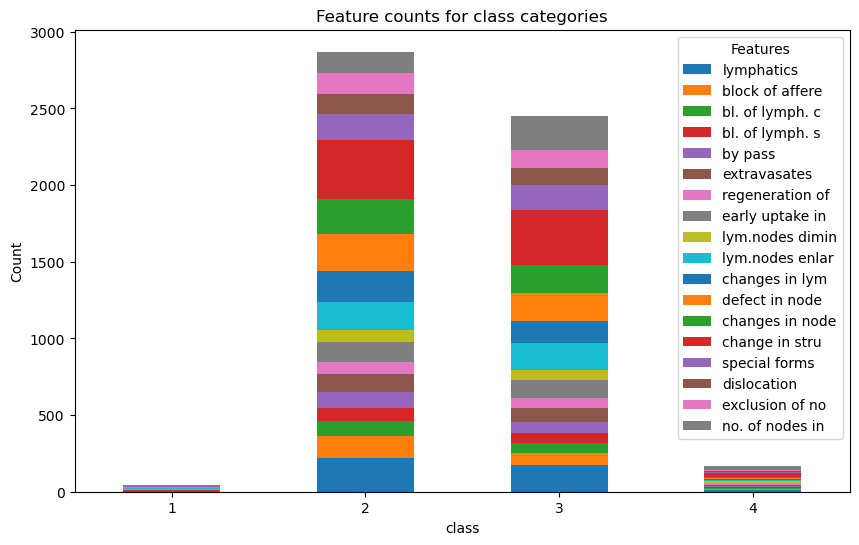

In [59]:
# Group the data by 'class' and sum the counts of each category within each class
grouped_df = df.groupby('class').sum()

# Create a stacked bar plot
ax = grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Count')
ax.set_title('Feature counts for class categories')
plt.xticks(rotation=0)
plt.legend(title='Features')
plt.show()

handel data

In [60]:
df = df.drop(
    ['defect in node',
    'changes in lym',
    'exclusion of no',
    'extravasates',
    'bl. of lymph. c',
    'regeneration of', 
    'by pass',
    'lym.nodes dimin',
    'bl. of lymph. s'], 
    axis = 1
)

In [61]:
df.to_csv('lymphdata_clean.csv', index=False)